1. Exploring Activation Functions in Neural Networks

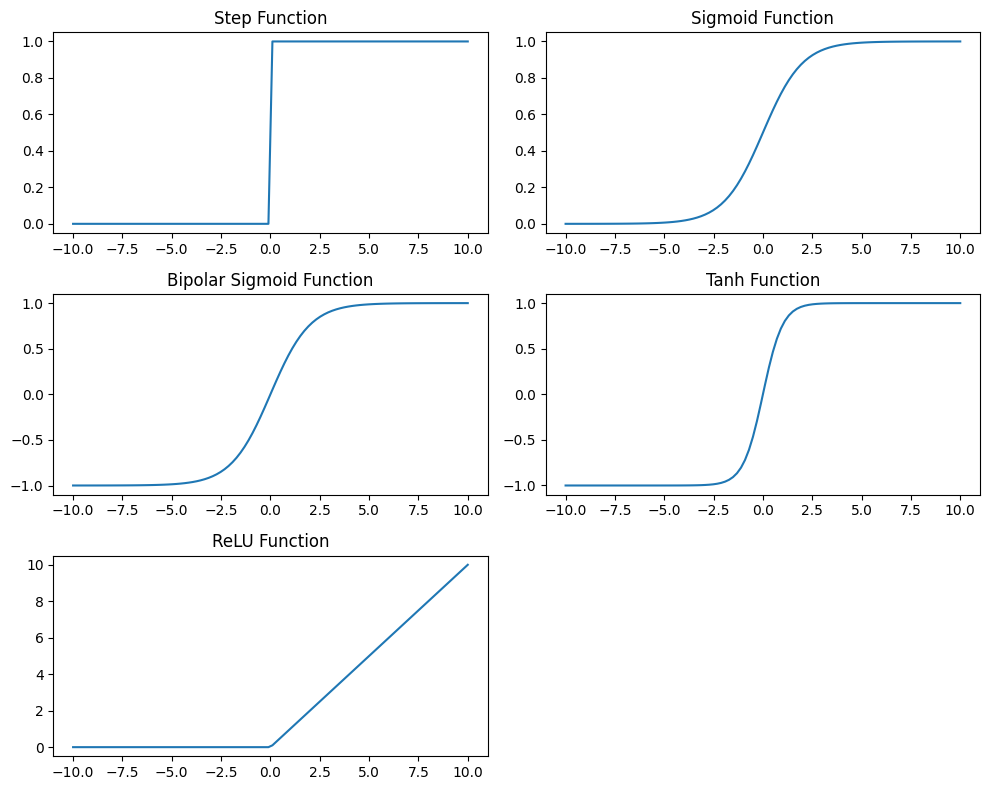

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step function
def step(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Bipolar sigmoid function
def bipolar_sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

# Tanh function
def tanh(x):
    return np.tanh(x)

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Visualization of functions
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(x, step(x))
plt.title('Step Function')

plt.subplot(3, 2, 2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')

plt.subplot(3, 2, 3)
plt.plot(x, bipolar_sigmoid(x))
plt.title('Bipolar Sigmoid Function')

plt.subplot(3, 2, 4)
plt.plot(x, tanh(x))
plt.title('Tanh Function')

plt.subplot(3, 2, 5)
plt.plot(x, relu(x))
plt.title('ReLU Function')

plt.tight_layout()
plt.show()


2. Implement a Simple Neural Network

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: logistic, Accuracy: 1.00
Activation: tanh, Accuracy: 1.00
Activation: relu, Accuracy: 1.00


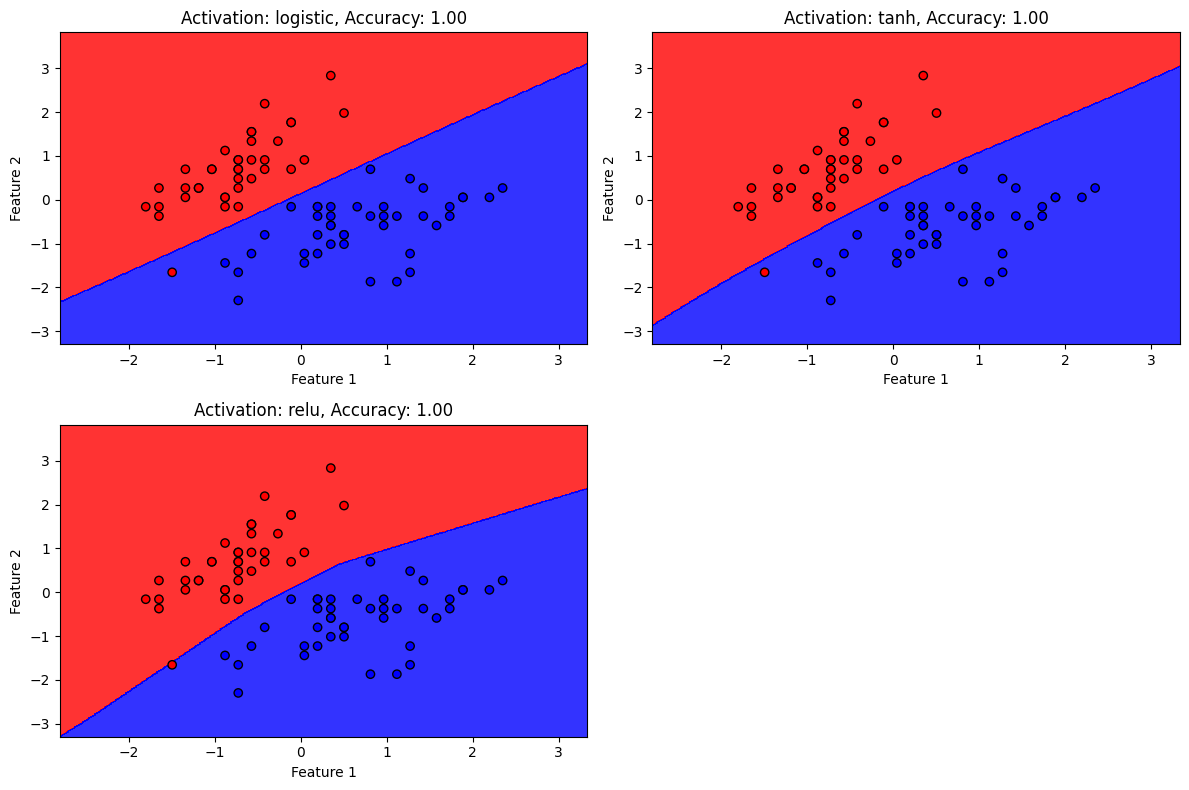

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use the first two features for 2D visualization
y = iris.target

# Keep only two classes for binary classification (setosa and versicolor)
X = X[y != 2]
y = y[y != 2]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=ListedColormap(('red', 'blue')), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Train neural networks with different activation functions
activations = ['logistic', 'tanh', 'relu']
plt.figure(figsize=(12, 8))

for i, activation in enumerate(activations):
    # Create and train the neural network model
    mlp = MLPClassifier(hidden_layer_sizes=(10,), activation=activation, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot decision boundary
    plt.subplot(2, 2, i+1)
    plot_decision_boundary(X_train, y_train, mlp, f'Activation: {activation}, Accuracy: {accuracy:.2f}')

    print(f'Activation: {activation}, Accuracy: {accuracy:.2f}')


plt.tight_layout()
plt.show()
